In [43]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import time as time
import random
from sklearn.cluster import AgglomerativeClustering, KMeans

In [48]:
cities=pd.read_csv("cities.csv")
costofliving=pd.read_csv("movehubcostofliving.csv")
qualoflife=pd.read_csv("movehubqualityoflife.csv")

In [49]:
temp = pd.merge(cities, costofliving, on=['City'])
cityData=pd.merge(temp, qualoflife, on=['City'])
cityData.drop_duplicates
cityData.head()

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Orlando,United States,1.96,5.88,7.52,0.66,1176.78,2013.61,84.39,71.07,76.01,70.75,82.33,55.07
1,Oslo,Norway,3.36,11.20,12.32,1.57,2016.66,2800.92,82.09,52.51,88.19,29.39,71.27,35.53
2,Ottawa,Canada,2.39,7.65,9.56,0.80,1020.02,2900.68,87.69,91.85,66.02,33.55,86.11,22.25
3,Oxford,United Kingdom,2.49,7.97,7.97,1.36,1494.67,1693.96,80.94,50.33,66.20,11.48,72.09,24.22
4,Quito,Ecuador,1.22,2.94,6.54,0.29,310.54,196.13,67.15,14.24,32.41,14.76,46.43,48.36


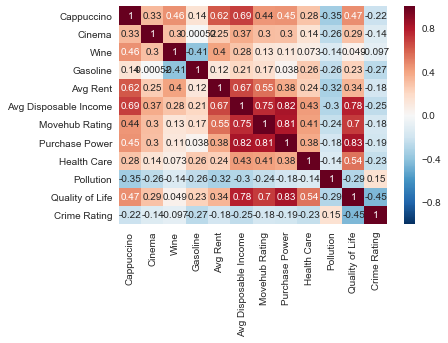

In [65]:
sns.heatmap(cityData.corr(), annot=True)
plt.savefig('corr')
plt.show()


In [4]:
x=cityData.iloc[:,3:14] 
y=cityData.iloc[:,2] 

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

C:\Users\ashle\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


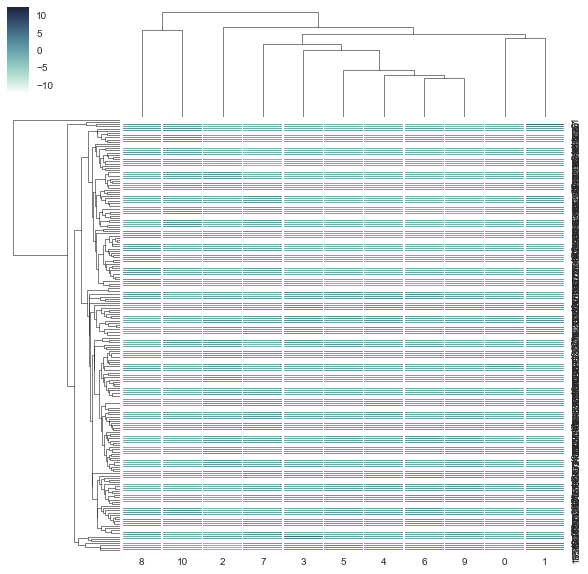

In [6]:
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sns.clustermap(x, cmap=cmap, linewidths=.5)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])

In [8]:
bigdata = pd.concat([cityData, principalDf], axis=1)

In [9]:
bigdata.head()

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,principal component 1,principal component 2
0,Orlando,United States,1.96,5.88,7.52,0.66,1176.78,2013.61,84.39,71.07,76.01,70.75,82.33,55.07,-1.247999,0.621274
1,Oslo,Norway,3.36,11.20,12.32,1.57,2016.66,2800.92,82.09,52.51,88.19,29.39,71.27,35.53,-2.758596,0.152056
2,Ottawa,Canada,2.39,7.65,9.56,0.80,1020.02,2900.68,87.69,91.85,66.02,33.55,86.11,22.25,-2.976829,0.514058
3,Oxford,United Kingdom,2.49,7.97,7.97,1.36,1494.67,1693.96,80.94,50.33,66.20,11.48,72.09,24.22,-1.399462,-0.555195
4,Quito,Ecuador,1.22,2.94,6.54,0.29,310.54,196.13,67.15,14.24,32.41,14.76,46.43,48.36,3.456964,1.243154


In [11]:
error=[]
for n_clusters in range(2,30):
    model = KMeans(n_clusters=n_clusters)
    model.fit(principalDf)
    error.append(model.inertia_)

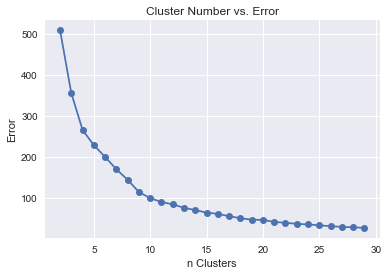

In [64]:
plt.plot(range(2,30),error, marker='o')
plt.title("Cluster Number vs. Error")
plt.xlabel("n Clusters")
plt.ylabel("Error")
plt.savefig('elbow')
plt.show()

In [70]:
emerging=['Brazil', 'Chile', 'China', 'Colombia', 'Hungary', 'Indonesia', 'India', 'Malaysia', 'Mexico', 'Peru', 'Philippines', 'Poland', 'Russia', 'South Africa', 'Thailand', 'Turkey']
developed=['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Hong Kong', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'South Korea', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']
hot=['Sudan', 'Oman', 'Iraq', 'India', 'Malaysia', 'Libya', 'Ethiopia', 'Iran', 'Saudi Arabia', 'Somalia']
cold=['Mongolia', 'Iceland', 'Finland', 'Canada', 'Greenaland', 'Russia', 'Antarctica','Kazakhstan']
#labels=bigdata.index[bigdata['Country'] == 'United States'].tolist()
#labels=bigdata.index[bigdata['Country'].isin(['United States','India', 'China', 'Brazil'])].tolist() 
labels=bigdata.index[bigdata['Country'].isin(emerging)].tolist() 

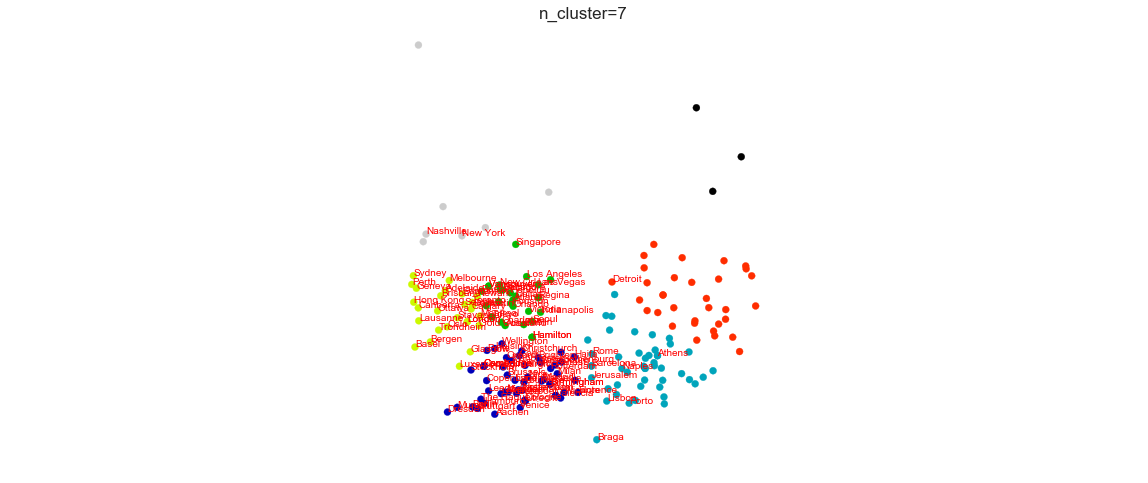

In [73]:
for n_clusters in range(7,8):
    plt.figure(figsize=(20, 8))
    model = KMeans(n_clusters=n_clusters)
    model.fit(principalDf)
    plt.scatter(bigdata.iloc[:, 14], bigdata.iloc[:, 15], c=np.array(model.labels_),cmap=plt.cm.spectral)
    plt.title('n_cluster=%i' % (n_clusters), size=17)
    plt.axis('equal')
    plt.axis('off')
    
    for label, x, y in zip(bigdata.iloc[labels, 0], bigdata.iloc[labels, 14], bigdata.iloc[labels, 15]):
        plt.annotate(label.decode('utf-8'), xy=(x, y), color='r')
    #name=str(n_clusters)+'_kMeans'+'.png'
    #plt.savefig('emerging')
    plt.show()

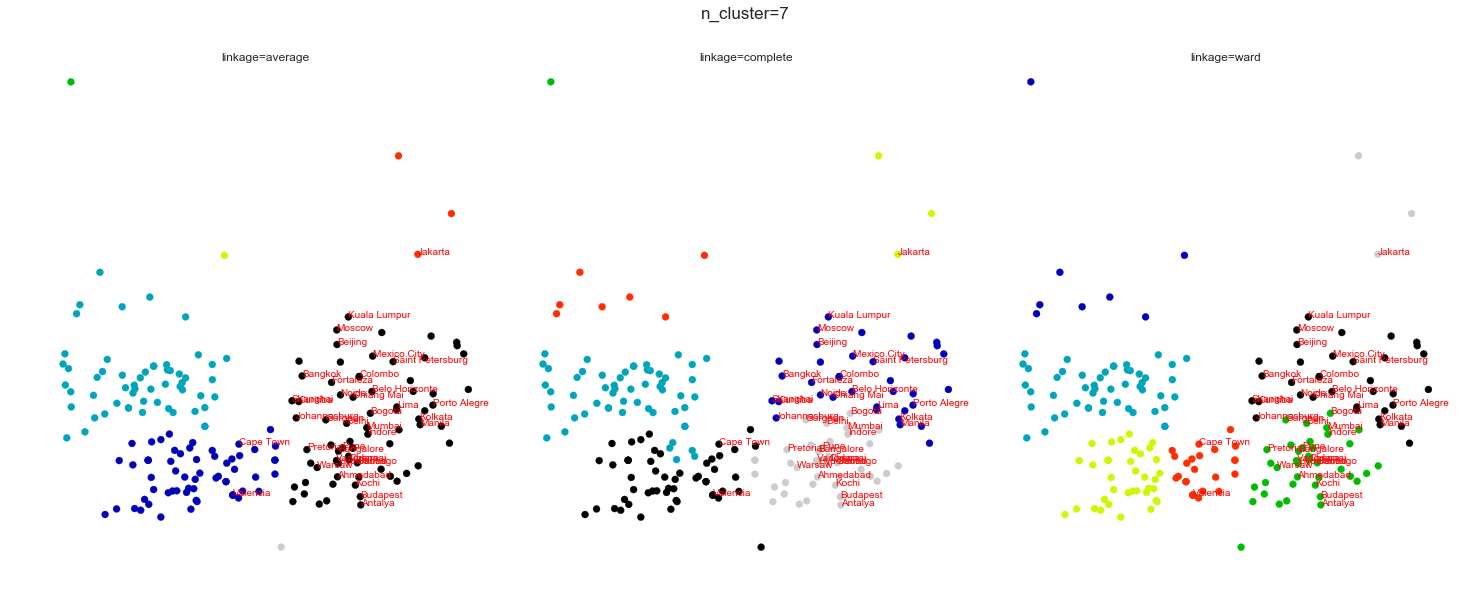

In [67]:
for n_clusters in range(7,8):
    plt.figure(figsize=(20, 8))
    for index, linkage in enumerate(('average', 'complete', 'ward')):
        plt.subplot(1, 3, index + 1)
        model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)
        model.fit(principalDf)
        plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=np.array(model.labels_),cmap=plt.cm.spectral)
        plt.title('linkage=%s' % (linkage),
                  fontdict=dict(verticalalignment='top'))
        plt.axis('equal')
        plt.axis('off')

        plt.subplots_adjust(bottom=0, top=.89, wspace=0, left=0, right=1)
        plt.suptitle('n_cluster=%i' % (n_clusters), size=17)
        
        for label, x, y in zip(bigdata.iloc[labels, 0], bigdata.iloc[labels, 14], bigdata.iloc[labels, 15]):
            plt.annotate(label.decode('utf-8'), xy=(x, y), color='r')
        #name=str(n_clusters)+'linkage'+'.png'
        #plt.savefig('linkageSingle')
plt.show()

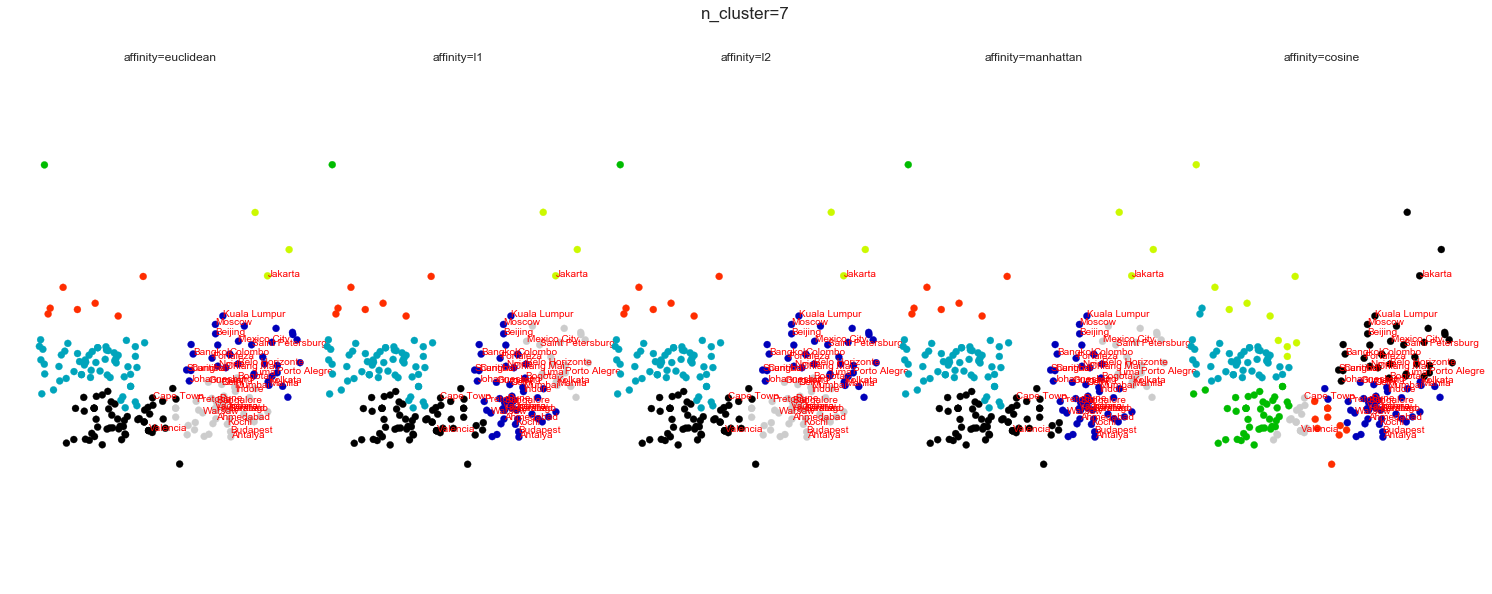

In [68]:
for n_clusters in range(7,8):
    plt.figure(figsize=(20, 8))
    for index, affinity in enumerate(('euclidean', 'l1', 'l2', 'manhattan', 'cosine')):
        plt.subplot(1, 5, index + 1)
        model = AgglomerativeClustering(affinity=affinity, n_clusters=n_clusters, linkage='complete')
        model.fit(principalDf)
        plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=np.array(model.labels_),cmap=plt.cm.spectral)
        plt.title('affinity=%s' % (affinity),
                  fontdict=dict(verticalalignment='top'))
        plt.axis('equal')
        plt.axis('off')

        plt.subplots_adjust(bottom=0, top=.89, wspace=0, left=0, right=1)
        plt.suptitle('n_cluster=%i' % (n_clusters), size=17)
    
        for label, x, y in zip(bigdata.iloc[labels, 0], bigdata.iloc[labels, 14], bigdata.iloc[labels, 15]):
            plt.annotate(label.decode('utf-8'), xy=(x, y), color='r')
        #name=str(n_clusters)+'affinity'+'.png'
        #plt.savefig('completeSingle')

plt.show()

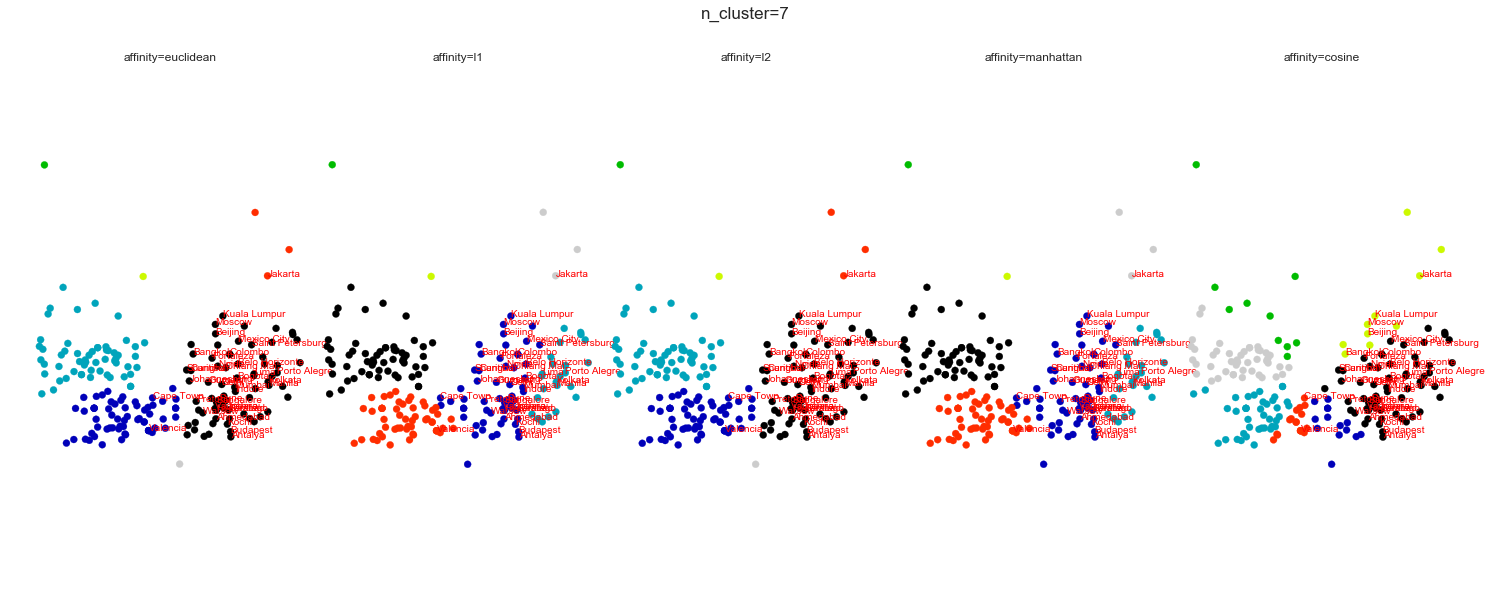

In [69]:
for n_clusters in range(7,8):
    plt.figure(figsize=(20, 8))
    for index, affinity in enumerate(('euclidean', 'l1', 'l2', 'manhattan', 'cosine')):
        plt.subplot(1, 5, index + 1)
        model = AgglomerativeClustering(affinity=affinity, n_clusters=n_clusters, linkage='average')
        model.fit(principalDf)
        plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=np.array(model.labels_),cmap=plt.cm.spectral)
        plt.title('affinity=%s' % (affinity),
                  fontdict=dict(verticalalignment='top'))
        plt.axis('equal')
        plt.axis('off')

        plt.subplots_adjust(bottom=0, top=.89, wspace=0, left=0, right=1)
        plt.suptitle('n_cluster=%i' % (n_clusters), size=17)
    
        for label, x, y in zip(bigdata.iloc[labels, 0], bigdata.iloc[labels, 14], bigdata.iloc[labels, 15]):
            plt.annotate(label.decode('utf-8'), xy=(x, y), color='r')
        #name=str(n_clusters)+'affinity'+'.png'
        #plt.savefig('averageSingle')

plt.show()